In [1]:
import os
import requests
import pandas as pd
import numpy as np
#from annotationframeworkclient import imagery
#from annotationframeworkclient.jsonservice import JSONService
#from annotationframeworkclient import imagery
import cloudvolume
from caveclient import CAVEclient
import nglui
from statistics import mean
import matplotlib.pyplot as plt

client = CAVEclient('minnie65_phase3_v1')
client.info.get_datastack_info()


{'viewer_resolution_z': 40.0,
 'proofreading_status_table': None,
 'soma_table': 'nucleus_neuron_svm',
 'proofreading_review_table': None,
 'viewer_resolution_x': 4.0,
 'viewer_resolution_y': 4.0,
 'description': 'This is the first version of Minnie that has proofreading enabled. Was first enabled on June 24, 2020. ',
 'segmentation_source': 'graphene://https://minnie.microns-daf.com/segmentation/table/minnie3_v1',
 'aligned_volume': {'name': 'minnie65_phase3',
  'description': "This is the second alignment of the IARPA 'minnie65' dataset, completed in the spring of 2020 that used the seamless approach.",
  'id': 1,
  'image_source': 'precomputed://https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/minnie65/em',
  'display_name': 'Minnie65'},
 'viewer_site': 'https://neuroglancer.neuvue.io/',
 'synapse_table': 'synapses_pni_2',
 'cell_identification_table': None,
 'local_server': 'https://minnie.microns-daf.com',
 'analysis_database': None}

In [2]:
# MAIN
#'y' location of cortical surface
surface_y_column =[84534, 85689, 86053, 87800, 89421, 90105, 82884, 81677, 86242]
average_surface_location = mean(surface_y_column)

In [6]:
# MAIN
#IMPORT SYNAPSE TABLE

pd.options.display.max_rows = None
pd.options.display.max_columns = None

synapse_table = pd.read_feather("ET_Column_synapse_table.feather")



In [5]:
synapse_table

ctr_pt_position  synapse_id         post_pt_position  \
0     [154418, 214622, 20098]   119648357  [154432, 214682, 20097]   
1     [142218, 213642, 19028]    98028751  [142196, 213598, 19026]   
2     [175767, 211411, 20943]   162814928  [175762, 211352, 20948]   
3     [160788, 214224, 20539]   134843766  [160824, 214178, 20534]   
4     [175200, 214703, 21080]   156158617  [175186, 214726, 21078]   
5     [174090, 220730, 21318]   156164886  [174148, 220708, 21322]   
6     [170316, 221875, 21920]   149187416  [170332, 221832, 21921]   
7     [165734, 215406, 22365]   142257444  [165702, 215404, 22361]   
8     [162059, 203633, 22408]   134667135  [162086, 203652, 22404]   
9     [175398, 215052, 21105]   156158761  [175440, 215006, 21105]   
10    [164600, 215262, 22501]   142256564  [164608, 215222, 22502]   
11    [170277, 215268, 21982]   147614745  [170380, 215210, 21973]   
12    [173006, 201452, 19686]   152811296  [173000, 201514, 19688]   
13    [173314, 201564, 19655]   152811564  [173292, 201580, 19654]   
14    [167238, 209322, 18592]   140975287  [167192, 209386, 18587]   
15    [179095, 217035, 21530]   162949133  [179068, 217034, 21531]   
16    [176848, 214328, 21401]   162959231  [176814, 214306, 21402]   
17    [169674, 211030, 19875]   147765711  [169702, 211032, 19883]   
18    [162522, 203772, 22196]   132631143  [162566, 203760, 22197]   
19    [169462, 208842, 20045]   148580097  [169382, 208838, 20045]   
20    [169666, 208914, 20091]   148580213  [169626, 208880, 20088]   
21    [156552, 215072, 23372]   127817842  [156626, 215150, 23374]   
22    [158590, 213886, 20456]   128036899  [158554, 213888, 20456]   
23    [168190, 214056, 22244]   147637037  [168166, 214086, 22246]   
24    [155480, 217938, 19813]   126855403  [155508, 217970, 19821]   
25    [147368, 213764, 19437]   113440978  [147444, 213818, 19437]   
26    [173788, 212564, 20847]   155471849  [173772, 212548, 20847]   
27    [156724, 219282, 19748]   126856387  [156740, 219272, 19746]   
28    [163258, 215846, 22526]   140353276  [163304, 215964, 22531]   
29    [170722, 218878, 22980]   145465511  [170690, 218930, 22975]   
30    [160590, 215360, 22933]   133374135  [160522, 215360, 22932]   
31    [190220, 213384, 21394]   182688151  [190218, 213354, 21399]   
32    [154562, 214588, 23500]   120881574  [154566, 214584, 23502]   
33    [175766, 219063, 21397]   161315907  [175848, 219120, 21410]   
34    [174394, 218946, 21308]   153401936  [174396, 218932, 21313]   
35    [164944, 206378, 21453]   141795131  [164976, 206342, 21455]   
36    [173294, 215250, 22015]   153807525  [173248, 215260, 22020]   
37    [162330, 215524, 22527]   134275986  [162350, 215530, 22518]   
38    [171470, 200240, 19459]   152810045  [171518, 200186, 19458]   
39    [164954, 203852, 21932]   141431642  [164918, 203850, 21928]   
40    [176383, 215710, 21396]   162958995  [176312, 215736, 21402]   
41    [156418, 215060, 23359]   127817764  [156390, 215046, 23358]   
42    [173266, 211212, 20425]   155616556  [173286, 211282, 20423]   
43    [169360, 210444, 19607]   147486031  [169374, 210396, 19609]   
44    [170512, 210802, 20091]   148580566  [170530, 210758, 20098]   
45    [170738, 200132, 19469]   148814413  [170748, 200082, 19470]   
46    [159576, 202872, 22402]   134665076  [159650, 202906, 22399]   
47    [175974, 210432, 20465]   162749754  [175938, 210424, 20475]   
48    [177506, 210362, 20443]   161137549  [177540, 210352, 20444]   
49    [152789, 214362, 23780]   120795214  [152784, 214364, 23778]   
50    [169235, 209131, 19569]   147485902  [169254, 209050, 19572]   
51    [168324, 213962, 22289]   149032744  [168374, 213896, 22285]   
52    [145220, 213864, 19272]   104235248  [145216, 213898, 19276]   
53    [159458, 202742, 22403]   134664993  [159470, 202710, 22407]   
54    [164986, 205464, 21473]   141795157  [164982, 205490, 21469]   
55    [168040, 209102, 18982]   148728530  [168040, 209148, 18982]   
56    [173278, 200912, 1

In [7]:
#ANALYSIS - GENERAL

#NUMBER OF SYNAPSES

synapse_numbers = { 'total_synapses' : len(synapse_table),
                    
                    'synapses_with_class_labels' : len(synapse_table[pd.notna(synapse_table['consensus_class'])]),
                    'synapses_with_class_labels_manual' : len(synapse_table[pd.notna(synapse_table['manual_class'])]),
                    'synapses_without_class_labels' : len(synapse_table[pd.isna(synapse_table['consensus_class'])]),
                   
                   
                    'synapses_with_subclass_labels' : len(synapse_table[pd.notna(synapse_table['consensus_subclass'])]),
                    'synapses with_subclass_labels_manual' : len(synapse_table[pd.notna(synapse_table['manual_subclass'])]),
                    'synapses_without_subclass_labels' : len(synapse_table[pd.isna(synapse_table['consensus_subclass'])]),
                   
                    'synapses_with_orphans' : len(synapse_table[synapse_table['num_soma'] == 0]),
                    'synapses_with_orphans_with_class_labels' : len(synapse_table[(synapse_table['num_soma'] == 0) &
                                                                    pd.notna(synapse_table['consensus_class'])]),
                    'synapses_with_orphans_without_class_labels' : len(synapse_table[(synapse_table['num_soma'] == 0) &
                                                                    pd.isna(synapse_table['consensus_class'])]),
                    'synapses_with_orphans_without_class_labels_spines': [],
                    'synapses_with_orphans_without_class_labels_dendrites': [],
                    'synapses_with_orphans_with_subclass_labels' : len(synapse_table[(synapse_table['num_soma'] == 0) &
                                                                    pd.notna(synapse_table['consensus_subclass'])]),
                    'synapses_with_orphans_without_subclass_labels' : len(synapse_table[(synapse_table['num_soma'] == 0) &
                                                                    pd.isna(synapse_table['consensus_subclass'])]),

                                   
                    'synapses_with_multisoma' : len(synapse_table[synapse_table['num_soma'] > 1]),
                    'synapses_with_multisoma_with_class_labels' : len(synapse_table[(synapse_table['num_soma'] > 1) &
                                                                    pd.notna(synapse_table['consensus_class'])]),
                    'synapses_with_multisoma_without_class_labels' : len(synapse_table[(synapse_table['num_soma'] > 1) &
                                                                    pd.isna(synapse_table['consensus_class'])]),
}


#NUMBER OF SOMATA

connection_numbers = {
                    'total_connections' : len(synapse_table[synapse_table['num_soma'] == 1].post_pt_root_id.unique()),
                   
                    'with_class_labels' : len(synapse_table[(pd.notna(synapse_table['consensus_class'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
                    'with_class_labels_manual' : len(synapse_table[(pd.notna(synapse_table['manual_class'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
                    'without_class_labels' : len(synapse_table[(pd.isna(synapse_table['consensus_class'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
                
    
                   
                    'with_subclass_labels' : len(synapse_table[(pd.notna(synapse_table['consensus_subclass'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
                    'with_subclass_labels_manual' : len(synapse_table[(pd.notna(synapse_table['manual_subclass'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
                    'without_subclass_labels' : len(synapse_table[(pd.isna(synapse_table['consensus_subclass'])) &
                                                             (synapse_table['num_soma'] == 1)].post_pt_root_id.unique()),
   
}

connection_numbers, synapse_numbers

({'total_connections': 1502,
  'with_class_labels': 1465,
  'with_class_labels_manual': 572,
  'without_class_labels': 37,
  'with_subclass_labels': 1447,
  'with_subclass_labels_manual': 229,
  'without_subclass_labels': 55},
 {'total_synapses': 3816,
  'synapses_with_class_labels': 3642,
  'synapses_with_class_labels_manual': 2491,
  'synapses_without_class_labels': 174,
  'synapses_with_subclass_labels': 3505,
  'synapses with_subclass_labels_manual': 1508,
  'synapses_without_subclass_labels': 311,
  'synapses_with_orphans': 269,
  'synapses_with_orphans_with_class_labels': 139,
  'synapses_with_orphans_without_class_labels': 130,
  'synapses_with_orphans_without_class_labels_spines': [],
  'synapses_with_orphans_without_class_labels_dendrites': [],
  'synapses_with_orphans_with_subclass_labels': 35,
  'synapses_with_orphans_without_subclass_labels': 234,
  'synapses_with_multisoma': 6,
  'synapses_with_multisoma_with_class_labels': 2,
  'synapses_with_multisoma_without_class_label

In [8]:
#ANALYSIS - FIGURE 2
#Number of synapses per ET neuron

client = CAVEclient('minnie65_phase3_v1')
client.info.get_datastack_info()

# setup an empty list
ds=[]

#Number of inputs and outputs for each PT neuron
pt_IDs = synapse_table.pre_pt_root_id.unique()

for pt_id in synapse_table.pre_pt_root_id.unique():

        print(pt_id)
        
        d={
                        'pt_soma_ID': pt_id,
                        'number_output_synapses': len(synapse_table[synapse_table['pre_pt_root_id'] == pt_id]),
                        'number_input_synapses': len(client.materialize.synapse_query(post_ids=pt_id)),
        }
        
        #append entry
        ds.append(d)

pt_io = pd.DataFrame(ds)
pt_io

864691135781927760


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135866820485


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136904334770


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691134941063523


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135576602910


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136137767293


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135492596063


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135082872567


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691134940999267


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135214123064


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135182879746


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135527124827


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135257367983


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136437631902


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135701528699


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136090267959


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135800958562


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135777116589


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135926717710


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135105143629


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135214122296


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135293076662


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135851941575


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136101105781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136330101226


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136362774498


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135565831447


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135866737541


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136310417242


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136124381734


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135640069691


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135477010344


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136287648195


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135082322679


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135859797864


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136039974142


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691136066689688


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135616964457


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


864691135367970809


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


pt_soma_ID  number_output_synapses  number_input_synapses
0   864691135781927760                      95                   5726
1   864691135866820485                      98                   3895
2   864691136904334770                     101                   4502
3   864691134941063523                      99                   6338
4   864691135576602910                      97                   5844
5   864691136137767293                      98                  11001
6   864691135492596063                      99                  26796
7   864691135082872567                      95                   8049
8   864691134940999267                      97                  12736
9   864691135214123064                      98                   4640
10  864691135182879746                      98                  12166
11  864691135527124827                      97                   6435
12  864691135257367983                      95                  10723
13  864691136437631902                      97                   6769
14  864691135701528699                     100                   5091
15  864691136090267959                     100                   6341
16  864691135800958562                      99                   7343
17  864691135777116589                     100                   5020
18  864691135926717710                      98                  10650
19  864691135105143629                      99                      0
20  864691135214122296                      98                   7184
21  864691135293076662                      97                  14839
22  864691135851941575                      98                   8134
23  864691136101105781                      99                   7105
24  864691136330101226                      98                   9137
25  864691136362774498                      97                   4944
26  864691135565831447                      97                   8996
27  864691135866737541                      99                  10036
28  864691136310417242                      97                  10046
29  864691136124381734                      98                   6867
30  864691135640069691                      99                   8073
31  864691135477010344                      99                   5131
32  864691136287648195                      96                   4256
33  864691135082322679                      93                  11045
34  864691135859797864                      98                   4049
35  864691136039974142                      99                   6417
36  864691136066689688                      99                   6887
37  864691135616964457                      97                   7329
38  864691135367970809                      98                   8813

In [ ]:
synapse_table[(synapse_table['pre_pt_root_id'] == 864691135367970809) &
                                     (synapse_table['consensus_subclass'] == '4P')])





In [ ]:
(client.materialize.query_table('nucleus_detection_v0', 
                               filter_equal_dict={'id':)['pt_position'].apply(lambda x: x[0]) - average_surface_location)*0.004

In [ ]:
anno_df['point'].apply(lambda x: x[0])

In [ ]:
synapse_table.motif_group.unique()


In [ ]:
len(synapse_table[ (synapse_table['pre_pt_root_id'] == 864691135660737776)]['post_pt_root_id'].unique())

In [ ]:
(client.materialize.query_table('nucleus_detection_v0', 
                               filter_equal_dict={'id':pre_soma_ID})['pt_position'].apply(lambda x: x[0]).iloc[0])

In [ ]:
synapse_table = synapse_table.rename(columns={"pre_nucleus_id2": "pre_nucleus_id"})


In [9]:
#ANALYSIS - FIGURE 2
#MAKE STATS DATAFRAME - All synapses and connections

np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []

#IDs of presynaptic PT neurons
pre_soma_IDs = synapse_table['pre_nucleus_id'].unique()


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
   
    stat_values={

                    'ID': pre_soma_ID,
                    
        #SYNAPSES
                    
                    'all_syn_total': len(synapse_table[ (synapse_table['pre_nucleus_id'] == pre_soma_ID)]),
                    'all_e_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory')]),
                    'all_i_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory')]),        
                    'all_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_class']))]),
                    
        
                    'all_23P_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P')]),
        
                    'all_4P_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P')]),
                    'all_5P-PT_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-PT')]),
                    'all_5P-NP_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP')]), 
                    'all_5P-IT_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT')]), 
                
                    'all_6P_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P')]),
        
                    'all_6P-CT_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P-CT')]),
        
                    'all_6P-IT_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P-IT')]),
        
                    'all_BC_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC')]),
        
                    'all_MC_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC')]),
        
                    'all_BPC_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC')]),
        
                    'all_NGC_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC')]),
        
                    'all_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_subclass']))]),
        
        
        #CONNECTIONS
                    'all_con_total': len(synapse_table[ (synapse_table['pre_nucleus_id'] == pre_soma_ID)]
                                         ['post_pt_root_id'].unique()),
                    
                    'all_e_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory')]
                                      ['post_pt_root_id'].unique()),
                    
                    'all_i_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory')]
                                      ['post_pt_root_id'].unique()),
        
                    'all_Undetermined_class_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_class']))]['post_pt_root_id'].unique()),                      
        
                    'all_23P_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P')]['post_pt_root_id'].unique()),
        
                    'all_4P_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P')]['post_pt_root_id'].unique()),
                    
                    'all_5P-PT_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-PT')]['post_pt_root_id'].unique()),
                    
                    'all_5P-NP_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP')]['post_pt_root_id'].unique()), 
 
                    'all_5P-IT_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_6P_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P')]['post_pt_root_id'].unique()),
                
                    'all_6P-CT_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P-CT')]['post_pt_root_id'].unique()),
        
                    'all_6P-IT_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_BC_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC')]['post_pt_root_id'].unique()),
                     
                    'all_MC_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC')]['post_pt_root_id'].unique()),
       
                    'all_BPC_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC')]['post_pt_root_id'].unique()),
                    
                    'all_NGC_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC')]['post_pt_root_id'].unique()),
        
                    'all_Undetermined_subclass_con#': len(synapse_table[(synapse_table['pre_nucleus_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_subclass']))]['post_pt_root_id'].unique()),
                        
        
    }
    values.append(stat_values)
    
    
    stat_percentage={

                    'ID': pre_soma_ID,
                    'Soma_depth':  (client.materialize.query_table('nucleus_detection_v0', 
                               filter_equal_dict={'id':pre_soma_ID})['pt_position'].apply(lambda x: x[1]).iloc[0]
                                                  - average_surface_location)*0.004,
                   
                      
                    'i_syn': stat_values['all_i_syn#'] / stat_values['all_syn_total'],
                    'e_syn': stat_values['all_e_syn#'] / stat_values['all_syn_total'],
                    'Undetermined_class_syn': stat_values['all_Undetermined_class_syn#'] / stat_values['all_syn_total'],

        
                    'i_syn_determined': stat_values['all_i_syn#'] / (stat_values['all_i_syn#']+stat_values['all_e_syn#']),
                    'e_syn_determined': stat_values['all_e_syn#'] / (stat_values['all_i_syn#']+stat_values['all_e_syn#']),
        
        
                    '23P_syn': stat_values['all_23P_syn#'] / stat_values['all_syn_total'],
                    '4P_syn': stat_values['all_4P_syn#'] / stat_values['all_syn_total'],
                    '5P-PT_syn': stat_values['all_5P-PT_syn#'] / stat_values['all_syn_total'],
                    '5P-IT_syn': stat_values['all_5P-IT_syn#'] / stat_values['all_syn_total'],
                    '5P-NP_syn': stat_values['all_5P-NP_syn#'] / stat_values['all_syn_total'],
                    '6P_syn': stat_values['all_6P_syn#'] / stat_values['all_syn_total'],
                    '6P-IT_syn': stat_values['all_6P-IT_syn#'] / stat_values['all_syn_total'],
                    '6P-CT_syn': stat_values['all_6P-CT_syn#'] / stat_values['all_syn_total'],
                    'BC_syn': stat_values['all_BC_syn#'] / stat_values['all_syn_total'],
                    'MC_syn': stat_values['all_MC_syn#'] / stat_values['all_syn_total'],
                    'BPC_syn': stat_values['all_BPC_syn#'] / stat_values['all_syn_total'],
                    'NGC_syn': stat_values['all_NGC_syn#'] / stat_values['all_syn_total'],
                    'Undetermined_subclass_syn': stat_values['all_Undetermined_subclass_syn#'] / stat_values['all_syn_total'],
        
        
                    'i_con': stat_values['all_i_con#'] / stat_values['all_con_total'],
                    'e_con': stat_values['all_e_con#'] / stat_values['all_con_total'],
                    'Undetermined_class_con': stat_values['all_Undetermined_class_con#'] / stat_values['all_con_total'],
                   
        
                    '23P_con': stat_values['all_23P_con#'] / stat_values['all_con_total'],
                    '4P_con': stat_values['all_4P_con#'] / stat_values['all_con_total'],
                    '5P-PT_con': stat_values['all_5P-PT_con#'] / stat_values['all_con_total'],
                    '5P-IT_con': stat_values['all_5P-IT_con#'] / stat_values['all_con_total'],
                    '5P-NP_con': stat_values['all_5P-NP_con#'] / stat_values['all_con_total'],
                    '6P_con': stat_values['all_6P_con#'] / stat_values['all_con_total'],
                    '6P-IT_con': stat_values['all_6P-IT_con#'] / stat_values['all_con_total'],
                    '6P-CT_con': stat_values['all_6P-CT_con#'] / stat_values['all_con_total'],
                    'BC_con': stat_values['all_BC_con#'] / stat_values['all_con_total'],
                    'MC_con': stat_values['all_MC_con#'] / stat_values['all_con_total'],
                    'BPC_con': stat_values['all_BPC_con#'] / stat_values['all_syn_total'],
                    'NGC_con': stat_values['all_NGC_con#'] / stat_values['all_con_total'],
                    'Undetermined_subclass_con': stat_values['all_Undetermined_subclass_con#'] / stat_values['all_con_total'],
                   
    }
    percentage.append(stat_percentage) 
    

synapse_table_values = pd.DataFrame(values)
synapse_table_percentage = pd.DataFrame(percentage)


#stats_type.append(stat)   


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please up

In [10]:
#synapse_table_percentage
synapse_table_values

ID  all_syn_total  all_e_syn#  all_i_syn#  \
0   267008             95          26          67   
1   267260             98          40          56   
2   266848            101          31          67   
3   267183             99          36          59   
4   267185             97          55          38   
5   267029             98          28          69   
6   267033             99          23          75   
7   267038             95          32          61   
8   267194             97          23          71   
9   267295             98          45          45   
10  267294             98          21          76   
11  267299             97          28          62   
12  267307             95          16          72   
13  265045             97          37          56   
14  269350            100          48          47   
15  267319            100          42          57   
16  300897             99          45          51   
17  303135            100           8          90   
18  303032             98          20          73   
19  304956             99          39          54   
20  303035             98          44          47   
21  302951             97          22          71   
22  302955             98          35          54   
23  302957             99          31          65   
24  303139             98          31          63   
25  303046             97          39          49   
26  303048             97          31          60   
27  303144             99          12          81   
28  303145             97          22          66   
29  304973             98          31          57   
30  302972             99          40          55   
31  303066             99          46          46   
32  305197             96          41          49   
33  303216             93          31          58   
34  302861             98          45          48   
35  301225             99          61          30   
36  303095             99          43          50   
37  303174             97          33          60   
38  303100             98          38          58   

    all_Undetermined_class_syn#  all_23P_syn#  all_4P_syn#  all_5P-PT_syn#  \
0                             2             0            0               0   
1                             2             0            0               0   
2                             3             1            0               0   
3                             4             0            1               0   
4                             4             0            1               0   
5                             0             0            0               0   
6                             0             0            0               0   
7                             2             0            2               0   
8                             3             0            0               0   
9                             8             0            0               0   
10                            1             1            0               0   
11                            7             0            0               0   
12                            7             0            0               0   
13                            4             0            0               0   
14                            5             0            0               0   
15                            1             0            0               0   
16                            3             0            1               0   
17                            2             0            0               0   
18                            5             0            0               0   
19                            6             0            0               0   
20                            7             0            8               0   
21                            0             0            0               0   
22                            9             0            1               0   
23             

In [ ]:
synapse_table_percentage.Soma_depth.values

In [21]:
#synapses versus connections


print('total number of synapses with I targets = ', synapse_table_values['all_i_syn#'].sum())

print('total number of connections with I targets = ', synapse_table_values['all_i_con#'].sum())

print('synapses per connection with I targets = ', synapse_table_values['all_i_syn#'].sum()/
      synapse_table_values['all_i_con#'].sum())

print('total number of synapses with E targets = ', synapse_table_values['all_e_syn#'].sum())

print('total number of connections with E targets = ', synapse_table_values['all_e_con#'].sum())

print('synapses per connection with E targets = ', synapse_table_values['all_e_syn#'].sum()/
      synapse_table_values['all_e_con#'].sum())

total number of synapses with I targets =  2313
total number of connections with I targets =  1381
synapses per connection with I targets =  1.674873280231716
total number of synapses with E targets =  1319
total number of connections with E targets =  1256
synapses per connection with E targets =  1.0501592356687899


In [11]:
#ANALYSIS - FIGURE 2.c
#percentage of inhibitory targets


#synapse_table_stats = synapse_table_totals
#synapse_table_stats = pd.DataFrame(synapse_table_percentage.mean()).transpose()


#plt.style.use('_mpl-gallery')

# make the data

# size and color:
sizes = 40
#colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(synapse_table_percentage['i_syn_determined'].values, synapse_table_percentage['Soma_depth'].values, s=sizes) 
ax.invert_yaxis()
plt.tight_layout()

fig.savefig('Column_E_I.eps', bbox_inches='tight')

#ax.set(xlim=(0, 1), xticks=np.arange(0, 1),
#       ylim=(350, 600), yticks=np.arange(350, 600))

plt.show()









In [ ]:
synapse_table[(synapse_table['post_pt_position_y'] == 193298)]

In [ ]:
synapse_table_splitxyz = synapse_table

synapse_table_splitxyz['post_pt_position_x'] = synapse_table_splitxyz['post_pt_position'].apply(lambda x: x[0])
synapse_table_splitxyz['post_pt_position_y'] = synapse_table_splitxyz['post_pt_position'].apply(lambda x: x[1])
synapse_table_splitxyz['post_pt_position_z'] = synapse_table_splitxyz['post_pt_position'].apply(lambda x: x[2])



In [ ]:
#ANALYSIS - FIGURE 2.d
#boxplot


plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
#D = np.random.normal((3, 5, 4))
D = synapse_table_percentage.i_syn_determined.values

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D,  widths=1.5, patch_artist=True,
                showmeans=True, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})


#ax.set_yticks()
ax.set(xlim=(0, 2), xticks=np.arange(0, 2),
       ylim=(0, 1), yticks=np.arange(0, 1.1 , 0.1))

fig.savefig('Column_E_I_box.eps', bbox_inches='tight')

plt.show()

In [ ]:
#ANALYSIS - FIGURE 2.e
# skeleton of inhibitory neuron

%load_ext autoreload
%autoreload 2
import skeleton_plot as skelplot
from skeleton_plot.skel_io import *
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline





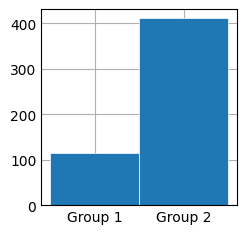

In [22]:
#ANALYSIS - FIGURE 2.g
#percentage of Inhibitory group 2 targets


#number of synapses with Inhibitory group 1 targets
group1 = len(synapse_table[(synapse_table['inhibitory_groups'] ==  1)])

#number of synapses with Inhibitory group 2 targets
group2 = len(synapse_table[(synapse_table['inhibitory_groups'] ==  2)])


import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = ['Group 1', 'Group 2']
y = [group1, group2]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.5)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

fig.savefig('Column_inhibitory_groups_input.eps', bbox_inches='tight')

plt.show()




In [23]:
print(group1, group2)

115 411


In [ ]:
len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibs_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibs_subclass']))]['post_pt_root_id'].unique())



In [ ]:
pre_soma_ID


In [ ]:
synapse_table[ (pd.isnull(synapse_table['target_soma_area']))].num_soma.unique()
        

In [ ]:
#UNDER DEVELOPMENT
#ANALYSIS - FIGURE 2
#MAKE STATS DATAFRAME - All synapses formed with soma selected by area

np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []

#IDs of presynaptic PT neurons
pre_soma_IDs = synapse_table['pre_pt_root_id'].unique()


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
   
    stat_values={

                    'ID': pre_soma_ID, 
                  
                    #SYNAPSES
        
                    #V1
                    
                    'all_total_syn#': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
        
                    'NO_AREA_total_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                                            pd.isnull(synapse_table['target_soma_area'])]),
                     
                    'V1_total_syn#': len(synapse_table[ (synapse_table['target_soma_area'] == 'v1') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),                
                    
                    'V1_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'inhibitory') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                   
        
                    'V1_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'excitatory') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
        
                    
                    'V1_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_class'])) &
                                                                    (synapse_table['target_soma_area'] == 'v1')]),
        
                    'V1_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '23P') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '4P') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_5P-PT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-PT') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-NP') &
                                                   (synapse_table['target_soma_area'] == 'v1')]), 
                    'V1_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-IT') &
                                                   (synapse_table['target_soma_area'] == 'v1')]), 
                    'V1_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_6P-CT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-CT') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_6P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-IT') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BC') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'MC') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BPC') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'NGC') &
                                                   (synapse_table['target_soma_area'] == 'v1')]),
                    'V1_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_subclass'])) &
                                                   (synapse_table['target_soma_area'] == 'v1')]),

        
                    #HVA
                    'HVA_total_syn#': len(synapse_table[ (synapse_table['target_soma_area'] == 'hva') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    
                    'HVA_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'inhibitory') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
        
                    'HVA_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'excitatory') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
        
                    'HVA_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_class'])) &
                                                                    (synapse_table['target_soma_area'] == 'hva')]),
                    
                   
                    'HVA_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '23P') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '4P') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_5P-PT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-PT') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-NP') &
                                                   (synapse_table['target_soma_area'] == 'hva')]), 
                    'HVA_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-IT') &
                                                   (synapse_table['target_soma_area'] == 'hva')]), 
                    'HVA_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_6P-CT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-CT') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_6P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-IT') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BC') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'MC') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BPC') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'NGC') &
                                                   (synapse_table['target_soma_area'] == 'hva')]),
                    'HVA_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_subclass'])) &
                                                   (synapse_table['target_soma_area'] == 'hva')]),

        
        
    }
    values.append(stat_values)
    
    #print(stat_values['HVA_total_syn#'])
    if stat_values['HVA_total_syn#'] > 0:
    
        stat_percentage={

                    'ID': pre_soma_ID, 
                     
                    #SYNAPSES
        
                    #V1
        
                    'V1_i_syn': stat_values['V1_i_syn#'] / stat_values['V1_total_syn#'],
                    'V1_e_syn': stat_values['V1_e_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_class_syn': stat_values['V1_Undetermined_class_syn#'] / stat_values['V1_total_syn#'],
                    
        
                    'V1_23P_syn': stat_values['V1_23P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_4P_syn': stat_values['V1_4P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-PT_syn': stat_values['V1_5P-PT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-IT_syn': stat_values['V1_5P-IT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-NP_syn': stat_values['V1_5P-NP_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P_syn': stat_values['V1_6P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P-IT_syn': stat_values['V1_6P-IT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P-CT_syn': stat_values['V1_6P-CT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_BC_syn': stat_values['V1_BC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_MC_syn': stat_values['V1_MC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_BPC_syn': stat_values['V1_BPC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_NGC_syn': stat_values['V1_NGC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_subclass_syn': stat_values['V1_Undetermined_subclass_syn#'] / stat_values['V1_total_syn#'],
        
                    #HVA
        
                    'HVA_i_syn': stat_values['HVA_i_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_e_syn': stat_values['HVA_e_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_Undetermined_class_syn': stat_values['HVA_Undetermined_class_syn#'] / stat_values['HVA_total_syn#'],
                    
        
                    'HVA_23P_syn': stat_values['HVA_23P_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_4P_syn': stat_values['HVA_4P_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_5P-PT_syn': stat_values['HVA_5P-PT_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_5P-IT_syn': stat_values['HVA_5P-IT_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_5P-NP_syn': stat_values['HVA_5P-NP_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_6P_syn': stat_values['HVA_6P_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_6P-IT_syn': stat_values['HVA_6P-IT_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_6P-CT_syn': stat_values['HVA_6P-CT_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_BC_syn': stat_values['HVA_BC_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_MC_syn': stat_values['HVA_MC_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_BPC_syn': stat_values['HVA_BPC_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_NGC_syn': stat_values['HVA_NGC_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_Undetermined_subclass_syn': stat_values['HVA_Undetermined_subclass_syn#'] / stat_values['HVA_total_syn#'],
       
        }
    
    else:
        stat_percentage={

                    'ID': pre_soma_ID, 
                     
                    #SYNAPSES
        
                    #V1
        
                    'V1_i_syn': stat_values['V1_i_syn#'] / stat_values['V1_total_syn#'],
                    'V1_e_syn': stat_values['V1_e_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_class_syn': stat_values['V1_Undetermined_class_syn#'] / stat_values['V1_total_syn#'],
                    
        
                    'V1_23P_syn': stat_values['V1_23P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_4P_syn': stat_values['V1_4P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-PT_syn': stat_values['V1_5P-PT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-IT_syn': stat_values['V1_5P-IT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_5P-NP_syn': stat_values['V1_5P-NP_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P_syn': stat_values['V1_6P_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P-IT_syn': stat_values['V1_6P-IT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_6P-CT_syn': stat_values['V1_6P-CT_syn#'] / stat_values['V1_total_syn#'],
                    'V1_BC_syn': stat_values['V1_BC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_MC_syn': stat_values['V1_MC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_BPC_syn': stat_values['V1_BPC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_NGC_syn': stat_values['V1_NGC_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_subclass_syn': stat_values['V1_Undetermined_subclass_syn#'] / stat_values['V1_total_syn#'],
        
                    #HVA
        
                    'HVA_i_syn': stat_values['HVA_i_syn#'],
                    'HVA_e_syn': stat_values['HVA_e_syn#'],
                    'HVA_Undetermined_class_syn': stat_values['HVA_Undetermined_class_syn#'],
                    
        
                    'HVA_23P_syn': stat_values['HVA_23P_syn#'],
                    'HVA_4P_syn': stat_values['HVA_4P_syn#'],
                    'HVA_5P-PT_syn': stat_values['HVA_5P-PT_syn#'],
                    'HVA_5P-IT_syn': stat_values['HVA_5P-IT_syn#'],
                    'HVA_5P-NP_syn': stat_values['HVA_5P-NP_syn#'],
                    'HVA_6P_syn': stat_values['HVA_6P_syn#'],
                    'HVA_6P-IT_syn': stat_values['HVA_6P-IT_syn#'],
                    'HVA_6P-CT_syn': stat_values['HVA_6P-CT_syn#'],
                    'HVA_BC_syn': stat_values['HVA_BC_syn#'],
                    'HVA_MC_syn': stat_values['HVA_MC_syn#'],
                    'HVA_BPC_syn': stat_values['HVA_BPC_syn#'],
                    'HVA_NGC_syn': stat_values['HVA_NGC_syn#'],
                    'HVA_Undetermined_subclass_syn': stat_values['HVA_Undetermined_subclass_syn#'],
        }
    percentage.append(stat_percentage) 
    

synapse_area_table_values = pd.DataFrame(values)
synapse_area_table_percentage = pd.DataFrame(percentage)


#stats_type.append(stat)   



In [ ]:
#synapse_area_table_percentage
synapse_area_table_values.to_csv('syn_area_values.csv')
#synapse_area_table_percentage.to_csv('syn_area_percentage.csv')


In [ ]:
synapse_area_table_values

In [ ]:
synapse_table[(synapse_table['pre_pt_root_id'] == 864691135937444100)]

In [ ]:
#UNDER DEVELOPMENT
test
#ANALYSIS - FIGURE 2
#MAKE STATS DATAFRAME - All synapses per area

np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []

#IDs of presynaptic PT neurons
pre_soma_IDs = synapse_table['pre_pt_root_id'].unique()


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
   
    stat_values={

                    'ID': pre_soma_ID, 
                  
                    #SYNAPSES
        
                    #V1
                    
                    'all_syn_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    
                    'V1_syn#': len(synapse_table[ (synapse_table['base_soma_area'] == 'v1') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    
                    'V1_syn_e#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'excitatory') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
        
                    'V1_syn_i#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'inhibitory') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
        
                    'V1_syn_Undetermined_class#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_class'])) &
                                                                    (synapse_table['base_soma_area'] == 'v1')]),
        
                    'V1_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '23P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '4P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_5P-PT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-PT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-NP') &
                                                   (synapse_table['base_soma_area'] == 'v1')]), 
                    'V1_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-IT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]), 
                    'V1_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_6P-CT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-CT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_6P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-IT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'MC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BPC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'NGC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'V1_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_subclass'])) &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
        
                    #HVA
        
                    
                    'HVA_syn#': len(synapse_table[ (synapse_table['base_soma_area'] == 'hva') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    
                    'HVA_syn_e#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'excitatory') &
                                                   (synapse_table['base_soma_area'] == 'hva')]),
        
                    'HVA_syn_i#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'inhibitory') &
                                                   (synapse_table['base_soma_area'] == 'hva')]),
        
                    'HVA_syn_Undetermined_class#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_class'])) &
                                                                    (synapse_table['base_soma_area'] == 'hva')]),
                    
                   
                    'HVA_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '23P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '4P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_5P-PT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-PT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-NP') &
                                                   (synapse_table['base_soma_area'] == 'v1')]), 
                    'HVA_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-IT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]), 
                    'HVA_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_6P-CT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-CT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_6P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-IT') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'MC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BPC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'NGC') &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
                    'HVA_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_subclass'])) &
                                                   (synapse_table['base_soma_area'] == 'v1')]),
        
        #CONNECTIONS
                    'all_con_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]
                                         ['post_pt_root_id'].unique()),
                    
                    'all_e_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'excitatory')]
                                      ['post_pt_root_id'].unique()),
                    
                    'all_i_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_class'] == 'inhibitory')]
                                      ['post_pt_root_id'].unique()),
        
                    'all_Undetermined_class_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_class']))]['post_pt_root_id'].unique()),                      
        
                    'all_23P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '23P')]['post_pt_root_id'].unique()),
        
                    'all_4P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '4P')]['post_pt_root_id'].unique()),
                    
                    'all_5P-PT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-PT')]['post_pt_root_id'].unique()),
                    
                    'all_5P-NP_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-NP')]['post_pt_root_id'].unique()), 
 
                    'all_5P-IT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '5P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_6P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P')]['post_pt_root_id'].unique()),
                
                    'all_6P-CT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-CT')]['post_pt_root_id'].unique()),
        
                    'all_6P-IT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == '6P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_BC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BC')]['post_pt_root_id'].unique()),
                     
                    'all_MC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'MC')]['post_pt_root_id'].unique()),
       
                    'all_BPC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'BPC')]['post_pt_root_id'].unique()),
                    
                    'all_NGC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibsv2_subclass'] == 'NGC')]['post_pt_root_id'].unique()),
        
                    'all_Undetermined_subclass_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibsv2_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibsv2_subclass']))]['post_pt_root_id'].unique()),
                            
        
    }
    values.append(stat_values)
    
    
    stat_percentage={

                    'ID': pre_soma_ID, 
                      
                    'i_syn': stat_values['all_i_syn#'] / stat_values['all_syn_total'],
                    'e_syn': stat_values['all_e_syn#'] / stat_values['all_syn_total'],
                    
                    '23P_syn': stat_values['all_23P_syn#'] / stat_values['all_syn_total'],
                    '4P_syn': stat_values['all_4P_syn#'] / stat_values['all_syn_total'],
                    '5P-PT_syn': stat_values['all_5P-PT_syn#'] / stat_values['all_syn_total'],
                    '5P-IT_syn': stat_values['all_5P-IT_syn#'] / stat_values['all_syn_total'],
                    '5P-NP_syn': stat_values['all_5P-NP_syn#'] / stat_values['all_syn_total'],
                    '6P_syn': stat_values['all_6P_syn#'] / stat_values['all_syn_total'],
                    '6P-IT_syn': stat_values['all_6P-IT_syn#'] / stat_values['all_syn_total'],
                    '6P-CT_syn': stat_values['all_6P-CT_syn#'] / stat_values['all_syn_total'],
                    'BC_syn': stat_values['all_BC_syn#'] / stat_values['all_syn_total'],
                    'MC_syn': stat_values['all_MC_syn#'] / stat_values['all_syn_total'],
                    'BPC_syn': stat_values['all_BPC_syn#'] / stat_values['all_syn_total'],
                    'NGC_syn': stat_values['all_NGC_syn#'] / stat_values['all_syn_total'],
                    'Unclear_syn': stat_values['all_Unclear_syn#'] / stat_values['all_syn_total'],
        
        
                    'i_con': stat_values['all_i_con#'] / stat_values['all_con_total'],
                    'e_con': stat_values['all_e_con#'] / stat_values['all_con_total'],
                    
                    '23P_con': stat_values['all_23P_syn#'] / stat_values['all_syn_total'],
                    '4P_con': stat_values['all_4P_syn#'] / stat_values['all_syn_total'],
                    '5P-PT_con': stat_values['all_5P-PT_syn#'] / stat_values['all_syn_total'],
                    '5P-IT_con': stat_values['all_5P-IT_syn#'] / stat_values['all_syn_total'],
                    '5P-NP_con': stat_values['all_5P-NP_syn#'] / stat_values['all_syn_total'],
                    '6P_con': stat_values['all_6P_syn#'] / stat_values['all_syn_total'],
                    '6P-IT_con': stat_values['all_6P-IT_syn#'] / stat_values['all_syn_total'],
                    '6P-CT_con': stat_values['all_6P-CT_syn#'] / stat_values['all_syn_total'],
                    'BC_con': stat_values['all_BC_syn#'] / stat_values['all_syn_total'],
                    'MC_con': stat_values['all_MC_syn#'] / stat_values['all_syn_total'],
                    'BPC_con': stat_values['all_BPC_syn#'] / stat_values['all_syn_total'],
                    'NGC_con': stat_values['all_NGC_syn#'] / stat_values['all_syn_total'],
                    'Unclear_con': stat_values['all_Unclear_syn#'] / stat_values['all_syn_total'],
                   
    }
    percentage.append(stat_percentage) 
    

synapse_table_values = pd.DataFrame(values)
synapse_table_percentage = pd.DataFrame(percentage)


#stats_type.append(stat)   




In [ ]:
synapse_table

In [ ]:
synapse_area_table_values.to_csv('syn_area_values.csv')


In [ ]:
#ANALYSIS - FIGURE 4
import matplotlib.pyplot as plt

synapse_table


#plot one cell

idx = 0
#synapse_table_stats = synapse_table_totals
synapse_table_stats = pd.DataFrame(synapse_table_percentage.mean()).transpose()


#Color maps

#cmap = plt.get_cmap("tab20c")
#cmap = plt.cm.get_cmap("seismic")
cmap = plt.cm.get_cmap("RdYlBu")
#cmap = plt.cm.get_cmap("PiYG")
cmap_E = plt.cm.get_cmap("Blues")
cmap_I = plt.cm.get_cmap("Oranges")
cmap_E_in = plt.cm.get_cmap("Greys")
cmap_I_in = plt.cm.get_cmap("Reds")
cmap_E_234 = plt.cm.get_cmap("Greys")
cmap_E_6 = plt.cm.get_cmap("GnBu")


#Making Figure
#fig, ax = plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(synapse_table_stats.iloc[0]['ID'])

size = 0.3
#vals = np.array([[synapse_table_stats.iloc[0]['RL_e_syn#'],synapse_table_stats.iloc[0]['RL_i_syn#']], [1,3]])
vals = np.array([[synapse_table_stats.iloc[idx]['RL_l23pyr_syn#'],synapse_table_stats.iloc[idx]['RL_l4pyr_syn#'],
                  synapse_table_stats.iloc[idx]['RL_l5it_syn#'],synapse_table_stats.iloc[idx]['RL_l5np_syn#'],
                  synapse_table_stats.iloc[idx]['RL_l5pt_syn#'],synapse_table_stats.iloc[idx]['RL_l6tall_syn#'],
                  synapse_table_stats.iloc[idx]['RL_l6other_syn#'],synapse_table_stats.iloc[idx]['RL_l6middle_syn#']],
                  [synapse_table_stats.iloc[idx]['RL_sst_syn#'], 0, 0, synapse_table_stats.iloc[idx]['RL_basket_syn#'], 0,
                  synapse_table_stats.iloc[idx]['RL_vip_syn#'], 0, 0 ]])
                                                                                        
lab = ['', '', 'L5IT', 'L5NP', 'L5PT', 'L6T', '', 'L6M', 'SST', '', '','Bas', '', '', '', '']
#lab = ['L23', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6T', 'L6O', 'L6M', 'SST', 'Bas', 'VIP','', '', '', '', '']
    
    
#vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

inner_colors = np.concatenate((cmap_E([0.9]),cmap_I_in([0.90])),axis=0) 
#inner_colors = np.concatenate((cmap_E_in([1]),cmap_I_in([0])),axis=0) 
#

#outer_colors = np.concatenate((cmap_E(np.linspace(0.1,0.75,8)),cmap_I(np.linspace(0.1,0.75,8))),axis=0)

#outer_colors = np.concatenate((cmap_E_234(np.linspace(0.1,0.75,2)),cmap_E(np.linspace(0.1,0.75,3)),cmap_E_6(np.linspace(0.1,0.75,3)),cmap_I(np.linspace(0.1,0.75,8))),axis=0)
#outer_colors = np.concatenate((cmap_E(np.linspace(0.5,0.1,2)),cmap_E(np.linspace(0.4,0.9,3)),cmap_E_6(np.linspace(0.5,0.5,3)),cmap_I(np.linspace(0.2,0.75,3))),axis=0)

outer_colors = np.concatenate((cmap_E(np.linspace(0.5,0.1,2)),cmap_E(np.linspace(0.4,0.75,3)),cmap_E_6(np.linspace(0.45,0.45,3)),cmap_I(np.linspace(0.4,0.8,4)),cmap_I(np.linspace(0.4,0.9,4))),axis=0)



#inner_colors = cmap([1.,0.]) 
#outer_colors = cmap(np.concatenate((np.linspace(0.5,0.95,8),np.linspace(0.1,0.4,8)),axis=0))



ax2.pie(vals.flatten(), radius=1,labels = lab, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax2.pie(vals.sum(axis=1), radius=1-size,colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))


ax2.set(aspect="equal", title='RL ' + str(synapse_table_stats.iloc[idx]['RL_syn_total']))


#V1

vals = np.array([[synapse_table_stats.iloc[idx]['V1_l23pyr_syn#'],synapse_table_stats.iloc[idx]['V1_l4pyr_syn#'],
                  synapse_table_stats.iloc[idx]['V1_l5it_syn#'],synapse_table_stats.iloc[idx]['V1_l5np_syn#'],
                  synapse_table_stats.iloc[idx]['V1_l5pt_syn#'],synapse_table_stats.iloc[idx]['V1_l6tall_syn#'],
                  synapse_table_stats.iloc[idx]['V1_l6other_syn#'],synapse_table_stats.iloc[idx]['RL_l6middle_syn#']],
                  [synapse_table_stats.iloc[idx]['V1_sst_syn#'], 0, 0, synapse_table_stats.iloc[idx]['V1_basket_syn#'], 0,
                  synapse_table_stats.iloc[idx]['V1_vip_syn#'], 0, 0]])

lab = ['', '', 'L5IT', 'L5NP', 'L5PT', 'L6T', 'L6O', 'L6M', 'SST', '', '','Bas', '', '', '', '']
#lab = ['L23', 'L4', 'L5PT', 'L5NP', 'L5IT', 'L6T', 'L6O', 'L6M', 'SST', 'Bas', 'VIP','', '', '', '', '']
 

#cmap = plt.get_cmap("tab20c")
#inner_colors = cmap(np.arange(2)*5)
#outer_colors = cmap(np.array([12, 13, 0, 1, 2, 3, 14, 4, 5, 6, 7, 8, 9, 10]))


ax1.pie(vals.flatten(), radius=1,labels = lab, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.sum(axis=1), radius=1-size,colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title='V1 ' + str(synapse_table_stats.iloc[idx]['V1_syn_total']))
        

plt.savefig('V1_mean_pie.eps')
#plt.savefig(str(synapse_table_stats.iloc[idx]['ID'])+'_pie.eps')

plt.show()







In [ ]:
len(synapse_table[synapse_table['pre_pt_root_id'] == 864691135660737776])

len(all_synapses[all_synapses['pre_pt_root_id'] == 864691135660737776])

In [ ]:
#synapse_table[(synapse_table['consensus_class'] == 'None')]

unclassified = synapse_table[pd.isnull(synapse_table['consensus_class']) & pd.isnull(synapse_table['subclass_pred_v2']) & pd.isnull(synapse_table['ei_aibs'])]

unclassified.to_csv('unclassified.csv')

len(unclassified)


In [ ]:
len(synapse_table[synapse_table['manual_eiaibsv2_subclass'] == 'MC'].post_pt_root_id.unique())

In [ ]:
#CHECK FOR DIFFERENT LABELS TO THE SAME TARGET

ds = []

for ii in synapse_table.post_pt_root_id.unique():




In [ ]:
#create percentage of synapses inhibitory

ds = []

for ii in synapse_table.pre_pt_root_id.unique():

    total_synapses_axon_ei_aibs = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) & 
                   ((synapse_table['ei_aibs'] == 'inhibitory') | (synapse_table['ei_aibs'] == 'excitatory'))])
    
    total_synapses_axon_no_class = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) & 
                   pd.isna(synapse_table['ei_aibs'])])
    
    total_synapses_axon_ei_aibs_V1 = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) &
                  (synapse_table['synapse_area'] == 'v1') & (
                   (synapse_table['ei_aibs'] == 'inhibitory') | (synapse_table['ei_aibs'] == 'excitatory'))])
                                                       
    total_synapses_axon_ei_aibs_HVA = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) &
                  (synapse_table['synapse_area'] == 'hva') & (
                   (synapse_table['ei_aibs'] == 'inhibitory') | (synapse_table['ei_aibs'] == 'excitatory'))])
    
    total_synapses_axon_i_aibs_V1 = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) &
                  (synapse_table['synapse_area'] == 'v1') & 
                   (synapse_table['ei_aibs'] == 'inhibitory')])
    
    total_synapses_axon_i_aibs_HVA = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) &
                  (synapse_table['synapse_area'] == 'hva') & 
                   (synapse_table['ei_aibs'] == 'inhibitory')])
    
    if total_synapses_axon_ei_aibs_V1 > 0:
        percent_INH_V1 = total_synapses_axon_i_aibs_V1 / total_synapses_axon_ei_aibs_V1
    else:
        percent_INH_V1 = []
        
    if total_synapses_axon_ei_aibs_HVA > 0:
        percent_INH_HVA = total_synapses_axon_i_aibs_HVA / total_synapses_axon_ei_aibs_HVA
    else:
        percent_INH_HVA = []
       
      
    d ={
        'pre_pt_root_id': ii,
        'total_synapses_axon': len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True)]),
        'total_synapses_axon_ei_aibs': total_synapses_axon_ei_aibs,
        'total_synapses_axon_no_class': total_synapses_axon_no_class,
        'total_synapses_axon_ei_aibs_V1': total_synapses_axon_ei_aibs_V1,
        'total_synapses_axon_ei_aibs_HVA': total_synapses_axon_ei_aibs_HVA,
        'total_synapses_axon_i_aibs_V1': total_synapses_axon_i_aibs_V1,
        'total_synapses_axon_i_aibs_HVA': total_synapses_axon_i_aibs_HVA,
        'percent_INH_V1': percent_INH_V1,
        'percent_INH_HVA': percent_INH_HVA,
        
    }                                        
    ds.append(d)
    
inhibitory_percent = pd.DataFrame(ds)

In [ ]:
#MERGE DISTANCE MEASUREMENTS FROM ALEX MALDEN WITH 

all_synapses_AM = pd.read_feather('syn_df_updatedCS_feb4_updatedNC_feb8_updatedAM_feb12.feather')

In [ ]:
all_synapses_AM = all_synapses_AM[['id', 'path_len_from_pre', 'euc_dist_from_pre']] 


all_synapses_AM


In [ ]:
#Transfer the subclass labels using the merge function
synapse_table_AM = synapse_table.merge(all_synapses_AM, left_on='id',
                                                      right_on='id', how='left')


In [ ]:
synapse_table_AM = synapse_table_AM[['id', 'path_len_from_pre', 'euc_dist_from_pre']] 

In [ ]:
synapse_table_AM.equals(all_synapses_AM)

In [ ]:


list_of_ids = [864691136312087869,
864691135771641339,
864691135974684783,
864691136329252330,
864691135490443623,
864691135799993698,
864691135660536560,
864691135578270148,
864691135781081168,
864691135549842372,
864691135490442855,
864691137053815670,
864691135472222258,
864691135658190466,
864691135737493105,
864691135718757937,
864691135635738052,
864691135988571648,
864691136422870063]
synapse_table.query('post_pt_root_id in @list_of_ids')




In [ ]:
ii = 864691135373771208

len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
                  (synapse_table['is_axon'] == True) &
                                    (synapse_table['ei_aibs'] == 'None')])

In [ ]:
synapse_table


In [ ]:
#total_synapses_axon_no_class = len(synapse_table[(synapse_table['pre_pt_root_id'] == ii) &
#                  (synapse_table['is_axon'] == True) & 
#                   pd.isna(synapse_table['ei_aibs'])])

total_synapses_axon_no_class = synapse_table[
                  (synapse_table['is_axon'] == True) & 
                   pd.isna(synapse_table['ei_baylor'])]

root_id = total_synapses_axon_no_class['post_pt_root_id']


In [ ]:
root_id.to_csv('root_IDs.csv')

In [ ]:
total_synapses_no_class / total_synapses

In [ ]:
target_table = pd.read_feather('target_connectivity_feb21_v339.feather')

In [ ]:
target_table


In [ ]:
#SORT ID BY NUMBER OF CONNECTIONS OF NUMBER OF SYNAPSES

subclass= 'BC'

#subclass_table = synapse_table[synapse_table['manual_eiaibsv2_subclass'] == subclass]
#subclass_table = synapse_table[synapse_table['manual_eiaibsv2_subclass'] == subclass]


list_of_ids = synapse_table[synapse_table['manual_eiaibsv2_subclass'] == subclass].post_pt_root_id.unique()
#list_of_ids = subclass_table.post_pt_root_id.unique()



subclass_table = target_table.query('post_pt_root_id in @list_of_ids')

subclass_table.sort_values(by=['net_syn'], ascending=False)

In [ ]:
subclass_table.sort_values(by=['num_conn'], ascending=False).to_csv('ordered_MC.csv')

In [ ]:
#CHECK IF NEURONS ARE IN COLUMN TABLE

#check if neurons are in the column
client = CAVEclient('minnie65_phase3_v1')
client.info.get_datastack_info()

#select by subclass
#subclass= 'BC'
#list_of_ids = synapse_table[synapse_table['manual_eiaibsv2_subclass'] == subclass].post_pt_root_id.unique()

#select all post synaptic neurons
list_of_ids = synapse_table.post_pt_root_id.unique()

#get nucleus IDs
my_soma_df = client.materialize.query_table('nucleus_neuron_svm', filter_in_dict={'pt_root_id': list_of_ids})

#check if neurons are in the column
target_df = client.materialize.query_table('allen_v1_column_types_slanted')

#perform query
my_soma_df.query('pt_root_id in @target_df.pt_root_id')

In [ ]:
#CHECK IF NEURONS ARE IN CLAIRE'S POSTSYNAPTIC TABLE

target_table_df = client.materialize.query_table('cg_cell_type_calls')
#target_table_df = client.materialize.query_table('l5_mc_cg')

synapse_ids = target_table_df.target_id.values

#get post root IDs of one synapse
#client.materialize.query_table("synapses_pni_2", filter_equal_dict={'id': synapse_id})

#get post root IDs of Claire labels
target_synapse_df = client.materialize.query_table("synapses_pni_2", filter_in_dict={'id': synapse_ids})

list_of_claire_ids = target_synapse_df.post_pt_root_id.unique()

claire_soma_df = client.materialize.query_table('nucleus_neuron_svm', filter_in_dict={'pt_root_id': list_of_claire_ids})

#select all post synaptic neurons
list_of_my_ids = synapse_table[pd.notna(synapse_table['manual_subclass'])].post_pt_root_id.unique()

#get nucleus IDs
my_soma_df = client.materialize.query_table('nucleus_neuron_svm', filter_in_dict={'pt_root_id': list_of_my_ids})

#perform query
common_df = my_soma_df.query('pt_root_id in @claire_soma_df.pt_root_id')


In [ ]:
#CHECK IF NEURONS ARE IN CLAIRE MARTINOTTI TABLE

#select all post synaptic neurons
list_of_ids = synapse_table.post_pt_root_id.unique()

#get nucleus IDs
my_soma_df = client.materialize.query_table('nucleus_neuron_svm', filter_in_dict={'pt_root_id': list_of_ids})

#check if neurons are in the column
target_df = client.materialize.query_table('l5_mc_cg')

#perform query
my_soma_df.query('pt_root_id in @target_df.pt_root_id')

In [ ]:
#GET POST SYNAPTIC TARGETS OF NEURONS

import datetime
now_ts = datetime.datetime.utcnow()

#MCs
pre_root_IDs = [864691135407644617, 864691135577303557, 864691135113495449, 864691134940360035, 864691136041433430,
864691135785718724, 864691135724596395, 864691136334223795, 864691135577304325, 864691136056719576, 864691136618564493,
864691135988665856, 864691136451445247, 864691135754152141, 864691135969342309, 864691136966045646, 864691135212863360,
864691135776160941, 864691135856061230, 864691135571546917, 864691135683637746]

#BCs
#pre_root_IDs = [864691135341342405, 864691136577835284, 864691135737188228, 864691135856066862, 864691136100089205,
#864691136109199800, 864691136175460102, 864691135516232659, 864691135104298829, 864691135162621229, 864691135383158251,
#864691136032031675, 864691135407577801, 864691135837584531, 864691136194528588, 864691136723962621, 864691135947023969,
#864691135571557925, 864691135303399847, 864691135865968005, 864691136662432990, 864691135394307317,
#864691135585515900]

#Create DF with synapse outputs

for ii in pre_root_IDs:
        if ii == pre_root_IDs[0]:
            
            group_synapse_table = client.materialize.synapse_query(pre_ids=ii, timestamp=now_ts)
            print('hey',ii, len(group_synapse_table))
        
        else :
            group_synapse_table2 = client.materialize.synapse_query(pre_ids=ii, timestamp=now_ts)
            group_synapse_table = group_synapse_table.append(group_synapse_table2, ignore_index=True)
            print('hoy',ii, len(group_synapse_table), len(group_synapse_table2))

           

 # merge with cell class            
aibs_class_v2_df = client.materialize.query_table('allen_class_type_svm_v0', timestamp='now')

group_synapse_table= group_synapse_table.merge(aibs_class_v2_df[['pt_root_id','cell_type']].drop_duplicates(subset='pt_root_id', keep=False), left_on='post_pt_root_id',
                                                      right_on='pt_root_id', how='left')

group_synapse_table = group_synapse_table.rename(columns={"cell_type": "cell_class"})
#BC_synapse_table = BC_synapse_table.drop('pt_root_id', inplace=True, axis=1)


#merge with cell subclass            
aibs_subclass_v2_df = client.materialize.query_table('allen_subclass_type_svm_v0', timestamp='now')

group_synapse_table = group_synapse_table.merge(aibs_subclass_v2_df[['pt_root_id','cell_type']].drop_duplicates(subset='pt_root_id', keep=False), left_on='post_pt_root_id',
                                                      right_on='pt_root_id', how='left')

group_synapse_table = group_synapse_table.rename(columns={"cell_type": "cell_subclass"})

#calculate total percentage of PTs in output
total_PT = len(group_synapse_table[group_synapse_table['cell_subclass'] == '5P-PT'])/ (len(group_synapse_table[group_synapse_table['cell_subclass'] =='5P-PT'])
                                                              + len(group_synapse_table[group_synapse_table['cell_subclass'] =='5P-IT'])
                                                              + len(group_synapse_table[group_synapse_table['cell_subclass'] =='5P-NP']))


In [ ]:
group_synapse_table.head()

In [ ]:
#CALCULATE PERCENTAGE OF PT AND MC OUTPUTS PER PRESYNAPTIC NEURON
ds = []

for ii in pre_root_IDs:

    d ={
        'pre_pt_root_id': ii,
        'percent_PT_synapses': len(group_synapse_table[(group_synapse_table['cell_subclass'] == '5P-PT') & 
                                                    (group_synapse_table['pre_pt_root_id'] == ii)])
                             / (len(group_synapse_table[(group_synapse_table['cell_subclass'] =='5P-PT') 
                                                    & (group_synapse_table['pre_pt_root_id'] == ii)])
                             + len(group_synapse_table[(group_synapse_table['cell_subclass'] =='5P-IT') 
                                                    & (group_synapse_table['pre_pt_root_id'] == ii)])
                             + len(group_synapse_table[(group_synapse_table['cell_subclass'] =='5P-NP') 
                                                    & (group_synapse_table['pre_pt_root_id'] == ii)])),
        
        'total_PT_synapses': len(group_synapse_table[(group_synapse_table['cell_subclass'] == '5P-PT') & 
                                                    (group_synapse_table['pre_pt_root_id'] == ii)]),   
        
        'total_IT_synapses': len(group_synapse_table[(group_synapse_table['cell_subclass'] == '5P-IT') & 
                                                    (group_synapse_table['pre_pt_root_id'] == ii)]),      
        
        
        'percent_MC_synapses': len(group_synapse_table[(group_synapse_table['cell_subclass'] == 'MC') & 
                                                    (group_synapse_table['pre_pt_root_id'] == ii)])
                             / (len(group_synapse_table[(group_synapse_table['cell_subclass'] =='MC') 
                                                    & (group_synapse_table['pre_pt_root_id'] == ii)])
                             + len(group_synapse_table[(group_synapse_table['cell_subclass'] =='BC') 
                                                    & (group_synapse_table['pre_pt_root_id'] == ii)]))
        
        
        
        
        
       
        #'percent_PT_connections': percent_INH_HVA,
        
    }                                        
    ds.append(d)

PT_percent = pd.DataFrame(ds)

PT_percent = PT_percent.sort_values(by=['percent_PT_synapses'], ascending=False)

In [ ]:

PT_percent

In [ ]:
PT_percent_MC = PT_percent

In [ ]:
#Figure 4, make violin plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
#ax = sns.swarmplot(x=tips["total_bill"])

f, ax = plt.subplots(figsize=(10,8))

#palette={'l5pt':[0.12710496, 0.44018454, 0.70749712]}
#ax.set(xlim=(0, 0.9))


ax = sns.swarmplot(y=PT_percent["percent_PT_synapses"], size=8)
ax.set(ylim=(0, 0.9))


plt.savefig('swarm.eps')

In [ ]:
#GET POST SYNAPTIC TARGETS OF NEURON

pre_root_ID = 864691136577835284

post_soma_ids = client.materialize.synapse_query(pre_ids=pre_root_ID, timestamp='now')['post_pt_root_id']

ainbs_v2_df = client.materialize.query_table('allen_subclass_type_svm_v0', timestamp='now')

connectivity_results = ainbs_v2_df.query('pt_root_id in @post_soma_ids')

PTs_con = len(connectivity_results[connectivity_results['cell_type'] == '5P-PT'])
ITs_con = len(connectivity_results[connectivity_results['cell_type'] == '5P-IT'])
NPs_con = len(connectivity_results[connectivity_results['cell_type'] == '5P-NP'])



post_syn_df = client.materialize.synapse_query(pre_ids=pre_root_ID, timestamp='now')

#ainbs_v2_df = client.materialize.query_table('allen_subclass_type_svm_v0', timestamp='now')


#Transfer the subclass labels using the merge function
post_syn_df= post_syn_df.merge(ainbs_v2_df[['pt_root_id','cell_type']], left_on='post_pt_root_id',
                                                      right_on='pt_root_id', how='left')

#synapse_table_AM = synapse_table_AM[['id', 'path_len_from_pre', 'euc_dist_from_pre']] 

#synapse_results = ainbs_v2_df.query('pt_root_id in @post_syn_ids')

PTs_syn = len(post_syn_df[post_syn_df['cell_type'] == '5P-PT'])
ITs_syn = len(post_syn_df[post_syn_df['cell_type'] == '5P-IT'])
NPs_syn = len(post_syn_df[post_syn_df['cell_type'] == '5P-NP'])





In [ ]:
len(synapse_table)

In [ ]:
et_pre_ct_df


In [ ]:
#CREATE NEUROGLANCER LINK

from nglui import statebuilder

img, seg = statebuilder.from_client(client)

pt_map = statebuilder.PointMapper('target_soma_pt', linked_segmentation_column='post_pt_root_id')
anno = statebuilder.AnnotationLayerConfig('soma_pts', mapping_rules=pt_map, linked_segmentation_layer=seg.name,
                                          tags=['', 'BC'])
sb = statebuilder.StateBuilder([img, seg, anno], client=client)

#here is where you add the dataframe
sb.render_state(common_targets[['post_pt_root_id','target_soma_pt']], return_as='html')

[id, x,y,z]

In [ ]:
#INTERSECTION OF TWO DATAFRAMES
#IN THIS CASE COMMON TARGETS OF THE PTs AND MCs

common_targets = pd.merge(synapse_table[['post_pt_root_id','target_soma_pt']].drop_duplicates(subset='post_pt_root_id'),
                          group_synapse_table['post_pt_root_id'].drop_duplicates(), how='inner', on=['post_pt_root_id'])


In [ ]:
#ANALYSIS FIGURE SUBNETWORKS


#MC_synapses = pd.merge(PT_percent,
#                       subclass_table.drop_duplicates(), how='left',
#                       left_on='pre_pt_root_id', right_on='post_pt_root_id')

BC_synapses = pd.merge(PT_percent,
                       subclass_table.drop_duplicates(), how='left',
                       left_on='pre_pt_root_id', right_on='post_pt_root_id')




In [ ]:
BC_synapses


In [ ]:
#plot
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii


plt.xlabel("% of synapses onto MC")
plt.ylabel("% of synapses onto PT")
plt.title('synapses from BC that are targeted by PTs')

plt.scatter(BC_synapses['percent_MC_synapses'], BC_synapses['percent_PT_synapses'], s=10, alpha=0.5)
plt.show()



In [ ]:
# OPTIONAL
# create list of neurons for Figure 4 plots
synapse_table = synapse_table.rename(columns={"pre_soma_pt": "pre_soma_area"})


V1_neurons = synapse_table[synapse_table['pre_soma_area'] == 'v1']['pre_pt_root_id'].unique()
HVA_neurons = synapse_table[synapse_table['pre_soma_area'] == 'hva']['pre_pt_root_id'].unique()
All_neurons = list(V1_neurons) + list(HVA_neurons)
All_neurons

In [ ]:
# OPTIONAL
#ANALYSIS GENERAL
##ANALYSIS - FIGURE 4.a
#MAKE STATS DATAFRAME - All synapses and connections





np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []

#IDs of presynaptic PT neurons
pre_soma_IDs = All_neurons


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
    pre_nucleus_ID = synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID)].pre_nucleus_id2.unique().item(),
                    
    
    stat_values={

                    'ID': pre_soma_ID,
                    'nucleus_ID':  pre_nucleus_ID[0],
                    
                    #SYNAPSES
                    
                    'all_syn_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    'all_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_class'] == 'excitatory')]),
                    'all_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_class'] == 'inhibitory')]),
        
                    'all_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibs_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibs_class']))]),
                    
        
                    'all_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '23P')]),
        
                    'all_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '4P')]),
                    'all_5P-PT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-PT')]),
                    'all_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-NP')]), 
                    'all_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-IT')]), 
                
                    'all_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '6P')]),
        
                    'all_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'BC')]),
        
                    'all_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'MC')]),
        
                    'all_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'BPC')]),
        
                    'all_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'NGC')]),
        
                    'all_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibs_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibs_subclass']))]),
                    
        
        #CONNECTIONS
                    'all_con_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]
                                         ['post_pt_root_id'].unique()),
                    
                    'all_e_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_class'] == 'excitatory')]
                                      ['post_pt_root_id'].unique()),
                    
                    'all_i_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_class'] == 'inhibitory')]
                                      ['post_pt_root_id'].unique()),
        
                    'all_Undetermined_class_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibs_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibs_class']))]['post_pt_root_id'].unique()),                      
        
                    'all_23P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '23P')]['post_pt_root_id'].unique()),
        
                    'all_4P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '4P')]['post_pt_root_id'].unique()),
                    
                    'all_5P-PT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-PT')]['post_pt_root_id'].unique()),
                    
                    'all_5P-NP_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-NP')]['post_pt_root_id'].unique()), 
 
                    'all_5P-IT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '5P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_6P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == '6P')]['post_pt_root_id'].unique()),
                                    
                    'all_BC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'BC')]['post_pt_root_id'].unique()),
                     
                    'all_MC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'MC')]['post_pt_root_id'].unique()),
       
                    'all_BPC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'BPC')]['post_pt_root_id'].unique()),
                    
                    'all_NGC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['manual_eiaibs_subclass'] == 'NGC')]['post_pt_root_id'].unique()),
        
                    'all_Undetermined_subclass_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['manual_eiaibs_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['manual_eiaibs_subclass']))]['post_pt_root_id'].unique()),
                        
        
    }
    values.append(stat_values)
    
    
    stat_percentage={

                    'ID': pre_soma_ID,
                    'nucleus_ID':  pre_nucleus_ID[0],
                    
#                    'Soma_depth':  (client.materialize.query_table('nucleus_detection_v0', filter_equal_dict={'id':pre_nucleus_ID})['pt_position'].apply(lambda x: x[1]).iloc[0]- average_surface_location)*0.004,
                   
                      
                    'i_syn': stat_values['all_i_syn#'] / stat_values['all_syn_total'],
                    'e_syn': stat_values['all_e_syn#'] / stat_values['all_syn_total'],
                    'Undetermined_class_syn': stat_values['all_Undetermined_class_syn#'] / stat_values['all_syn_total'],
        
                    '23P_syn': stat_values['all_23P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '4P_syn': stat_values['all_4P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-PT_syn': stat_values['all_5P-PT_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-IT_syn': stat_values['all_5P-IT_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-NP_syn': stat_values['all_5P-NP_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '6P_syn': stat_values['all_6P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'BC_syn': stat_values['all_BC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'MC_syn': stat_values['all_MC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'BPC_syn': stat_values['all_BPC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'NGC_syn': stat_values['all_NGC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'Undetermined_subclass_syn': stat_values['all_Undetermined_subclass_syn#'] / stat_values['all_syn_total'],
        
        
                    'i_con': stat_values['all_i_con#'] / stat_values['all_con_total'],
                    'e_con': stat_values['all_e_con#'] / stat_values['all_con_total'],
                    'Undetermined_class_con': stat_values['all_Undetermined_class_con#'] / stat_values['all_con_total'],
                   
        
                    '23P_con': stat_values['all_23P_con#'] / stat_values['all_con_total'],
                    '4P_con': stat_values['all_4P_con#'] / stat_values['all_con_total'],
                    '5P-PT_con': stat_values['all_5P-PT_con#'] / stat_values['all_con_total'],
                    '5P-IT_con': stat_values['all_5P-IT_con#'] / stat_values['all_con_total'],
                    '5P-NP_con': stat_values['all_5P-NP_con#'] / stat_values['all_con_total'],
                    '6P_con': stat_values['all_6P_con#'] / stat_values['all_con_total'],
                    'BC_con': stat_values['all_BC_con#'] / stat_values['all_con_total'],
                    'MC_con': stat_values['all_MC_con#'] / stat_values['all_con_total'],
                    'BPC_con': stat_values['all_BPC_con#'] / stat_values['all_syn_total'],
                    'NGC_con': stat_values['all_NGC_con#'] / stat_values['all_con_total'],
                    'Undetermined_subclass_con': stat_values['all_Undetermined_subclass_con#'] / stat_values['all_con_total'],
                   
    }
    percentage.append(stat_percentage) 
    

synapse_table_values = pd.DataFrame(values)
synapse_table_percentage = pd.DataFrame(percentage)

#total_values = pd.DataFrame(synapse_table_values.sum(), columns=parts.columns, index=["Total"])
#stats_type.append(stat)   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#individual cells
heat_synapse_table = synapse_table_percentage[['23P_syn','4P_syn','5P-PT_syn','5P-IT_syn','5P-NP_syn','6P_syn','BC_syn','MC_syn','BPC_syn','NGC_syn']]
heat_synapse_table_E = synapse_table_percentage[['23P_syn','4P_syn','5P-PT_syn','5P-IT_syn','5P-NP_syn','6P_syn']]
heat_synapse_table_I = synapse_table_percentage[['BC_syn','MC_syn','BPC_syn','NGC_syn']]


#total percantages
short_synapse = synapse_table_values[['all_23P_syn#','all_4P_syn#','all_5P-PT_syn#','all_5P-IT_syn#','all_5P-NP_syn#',
                                      'all_6P_syn#','all_BC_syn#','all_MC_syn#','all_BPC_syn#','all_NGC_syn#']]
total_percentages = pd.DataFrame(short_synapse.sum()) / pd.DataFrame(short_synapse.sum()).sum()

sns.set()

ax = sns.heatmap(heat_synapse_table, cmap='RdYlBu_r', vmin=0, vmax=0.40)


plt.savefig("heatmap_all_synapses.pdf", format='pdf', dpi=1200)

plt.show()

In [ ]:
#percentage of PT targets


#synapse_table_stats = synapse_table_totals
#synapse_table_stats = pd.DataFrame(synapse_table_percentage.mean()).transpose()


#plt.style.use('_mpl-gallery')

# make the data

# size and color:
sizes = 40
#colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(synapse_table_percentage['5P-PT_sy'].values, synapse_table_percentage['Soma_depth'].values, s=sizes) 
ax.invert_yaxis()
plt.tight_layout()

fig.savefig('Column_E_I.eps', bbox_inches='tight')

#ax.set(xlim=(0, 1), xticks=np.arange(0, 1),
#       ylim=(350, 600), yticks=np.arange(350, 600))

plt.show()


In [ ]:
a = client.materialize.query_table('nucleus_detection_v0',
                                   filter_equal_dict={'id':[267008]})['pt_position']

In [ ]:
a

In [ ]:
synapse_table[(synapse_table['pre_pt_root_id'] == 864691135781927760)].pre_nucleus_id2.unique()[0].item()


In [ ]:
 synapse_table['pre_nucleus_id2'].unique()


In [ ]:
# MAIN
# combine all analysed synapses in the manuscript

# ET neurons from the column
synapse_table_column = pd.read_feather('syn_analysis_column_NC_May25.feather')
synapse_table_column = synapse_table_column['synapse_id']

print(len(synapse_table_column))

# ET neurons that were fully extended
synapse_table_extended = pd.read_feather('syn_analysis_extended_NC_June28.feather')
synapse_table_extended = synapse_table_extended['synapse_id']
print(len(synapse_table_extended))

# Merge tables
synapse_table_concat = pd.concat([synapse_table_column, synapse_table_extended], axis=0)
synapse_table_concat = synapse_table_concat.drop_duplicates( keep='first')
print(len(synapse_table_concat))



In [ ]:
synapse_table_extended = pd.read_feather('syn_analysis_extended_NC_June28.feather')

In [ ]:
synapse_table_column = pd.read_feather('syn_analysis_column_NC_May25.feather')


In [ ]:
synapse_table_extended.head()

In [ ]:
synapse_table_extended.manual_class.unique()

In [ ]:
synapse_table[pd.isna(synapse_table.num_soma)]

In [ ]:
# Orphan processes
# 4837931032248320

#upload neuroglancer data
from nglui import parser
state = client.state.get_state_json(4837931032248320)
anno_df = parser.annotation_dataframe(state)

#dictionary for the shortcuts/tags
tag_dict = parser.tag_dictionary(state, 'post_pt_position')

#Add tags

#standardize sub_class labels
def standard_classification(row):
            
    if row['tags'] == [9]:
          return 'single_spine'

    if row['tags'] == [10]:
          return 'dendrite'
    
    if row['tags'] == [11]:
          return 'error'
    
    if row['tags'] == [12]:
          return 'has_soma'
        
anno_df['classification'] = anno_df.apply(standard_classification, axis=1)


In [ ]:
now = client.materialize.get_timestamp()
et_table = 'nucleus_alternative_points'
et_df = client.materialize.query_table(et_table,timestamp = now)



In [ ]:
et_df[et_df['pt_root_id'] == 864691134965684255]

In [ ]:
et_df

In [ ]:
anno_df[anno_df['classification'] == 'has_soma']


In [ ]:
len(synapse_table[synapse_table['inhibitory_groups'] == 1].drop_duplicates(subset='post_pt_root_id'))